In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Cancer Diagnostics

Using set of breast [cancer data](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29), create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed? The following is information necessary to understanding the dataset taken from the [dataset description link.](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names)  

## Dataset Description

Attributes 2 through 10 have been used to represent instances.
   Each instance has one of 2 possible classes: benign or malignant.

   1. Wolberg,~W.~H., \& Mangasarian,~O.~L. (1990). Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology. In
      {\it Proceedings of the National Academy of Sciences}, {\it 87},
      9193--9196.
      -- Size of data set: only 369 instances (at that point in time)
      -- Collected classification results: 1 trial only
      -- Two pairs of parallel hyperplanes were found to be consistent with
         50% of the data
         -- Accuracy on remaining 50% of dataset: 93.5%
      -- Three pairs of parallel hyperplanes were found to be consistent with
         67% of data
         -- Accuracy on remaining 33% of dataset: 95.9%

   2. Zhang,~J. (1992). Selecting typical instances in instance-based
      learning.  In {\it Proceedings of the Ninth International Machine
      Learning Conference} (pp. 470--479).  Aberdeen, Scotland: Morgan
      Kaufmann.
      -- Size of data set: only 369 instances (at that point in time)
      -- Applied 4 instance-based learning algorithms 
      -- Collected classification results averaged over 10 trials
      -- Best accuracy result: 
         -- 1-nearest neighbor: 93.7%
         -- trained on 200 instances, tested on the other 169
      -- Also of interest:
         -- Using only typical instances: 92.2% (storing only 23.1 instances)
         -- trained on 200 instances, tested on the other 169

4. Relevant Information:

   Samples arrive periodically as Dr. Wolberg reports his clinical cases.
   The database therefore reflects this chronological grouping of the data.
   This grouping information appears immediately below, having been removed
   from the data itself:

     - Group 1: 367 instances (January 1989)
     - Group 2:  70 instances (October 1989)
     - Group 3:  31 instances (February 1990)
     - Group 4:  17 instances (April 1990)
     - Group 5:  48 instances (August 1990)
     - Group 6:  49 instances (Updated January 1991)
     - Group 7:  31 instances (June 1991)
     - Group 8:  86 instances (November 1991)
     - Total:   699 points (as of the donated datbase on 15 July 1992)

   Note that the results summarized above in Past Usage refer to a dataset
   of size 369, while Group 1 has only 367 instances.  This is because it
   originally contained 369 instances; 2 were removed.  The following
   statements summarizes changes to the original Group 1's set of data:
   

5. Number of Instances: 699 (as of 15 July 1992)


6. Number of Attributes: 10 plus the class attribute


7. Attribute Information: (class attribute has been moved to last column)


   Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)

8. Missing attribute values: 16

   There are 16 instances in Groups 1 to 6 that contain a single missing 
   (i.e., unavailable) attribute value, now denoted by "?".  

9. Class distribution:
 
   Benign: 458 (65.5%)
   Malignant: 241 (34.5%)

## Clean/Inspect Data

In [2]:
# import and show format
url="http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
df=pd.read_csv(url, header=None, error_bad_lines=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Since the data is already organized in this format, the columns will not be renamed and the Attribute Domain information in the dataset description used to analyze the results at the end. 

In addition, the dataset description shows that at least 2 other analyses have attempted to describe portions of the data through hyperplanes. Since this method has been used before, and much of the data relates to microbiological bodies/processes unknown to this author, a gradient boosting method will be used to analyze the data and find which traits are most indicative of a positive (malignant) diagnosis. 

The pd.getdummies() function will be used on Column 10, which shows a benign or malignant diganosis, in order to get a binary format for the model. 

Finally, there are some mentions of '?' in the data. Since these values are unknown and would skew the analysis, these rows will be dropped. 

In [3]:
# drop rows with '?'
df=df[df.iloc[0:10]!='?']
df=df.dropna()
# run get dummies on column 10
df[10]=pd.get_dummies(df[10])

## Gradient Boosting to Analyze Breast Cancer Diagnosis

In [4]:
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# set predictor and outcome data
y = df[10]
X = df.drop([0, 10], 1)
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# We'll make 200 iterations, use 2-deep trees, and set our loss function to exponential 
params={'n_estimators': 200, 
    'max_depth': 2, 
    'loss': 'exponential'}
# Initialize and fit the model.
gbr = ensemble.GradientBoostingClassifier(**params)
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

1.0

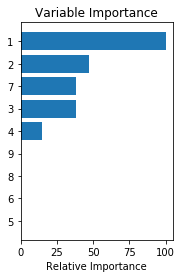

In [6]:
feature_importance = gbr.feature_importances_
# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()